In [1]:
from elec_bol20 import *
import elec_bol20.util as ebu

# info
Crea la transformación de cartograma para el modelo de predicciones

In [17]:

data = pd.read_excel(ebu.GEO_PATH_V1)
lalo = ['latitud', 'longitud']
data.groupby(lalo)
n = data.groupby(lalo)['latitud'].count()
n.name = 'repete'
_d = data.reset_index().set_index(lalo)
_d['repete'] = n
_d = _d.reset_index().set_index('index')
repete_ = _d['repete']>1
len_rep = len(_d[repete_])
_d.loc[repete_,'latitud'] = _d[repete_]['latitud'] +\
                                   (np.random.random(len_rep)-.5) * .05
_d.loc[repete_,'longitud'] = _d[repete_]['longitud'] + \
                                   (np.random.random(len_rep)-.5) * .05
data = _d

In [19]:
_d[['latitud','longitud']][repete_].sort_values(['latitud','longitud'])

,latitud,longitud
index,,
5364,-34.922214,-57.959696
5363,-34.918913,-57.979401
5365,-34.917359,-57.946834
5353,-34.770633,-58.596939
5358,-34.763476,-58.476278
...,...,...
5440,40.410403,-3.698202
5441,40.417683,-3.681817
5444,41.382574,2.187571


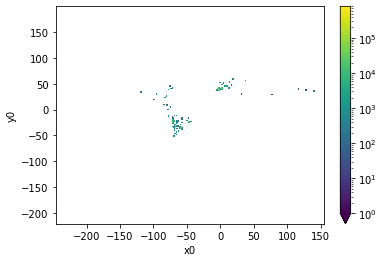

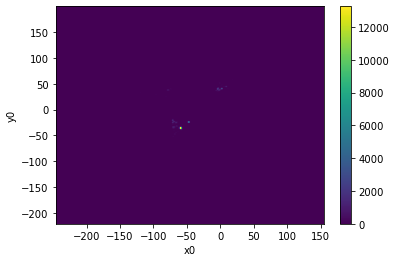

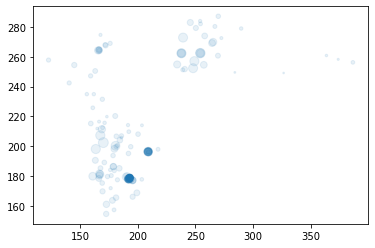

,y0,x0,pais,NombrePais,dep,nomdep,prov,nomprov,sec,nombremunicipio,...,TipoCircunscripcion,RECI,nombrerecinto,nHabilitados,temporary,FID,Dirección,repete,x1,y1
index,,,,,,,,,,,,,,,,,,,,,


In [37]:
data = data[data['NombrePais'] != 'Bolivia']
data = data.rename({'latitud': 'y0', 'longitud': 'x0'}, axis=1)

N = ebu.hab
x0, y0 = 'x0', 'y0'
x1, y1 = 'x1', 'y1'
_r = 1
sigma_gauss = 1
data0 = data.copy()
x_range = 200
y_range = 210
fun = lambda ds: ds**(1/2)+3

ndf = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

ndf[ndf['x1'].isnull()]

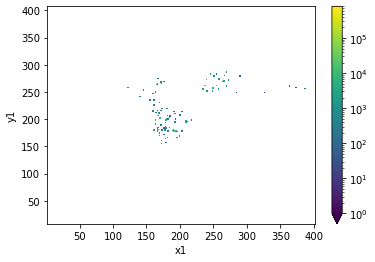

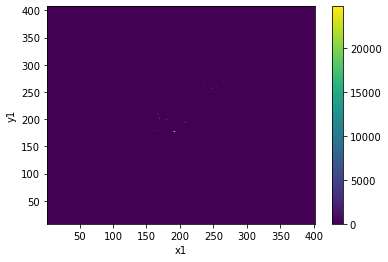

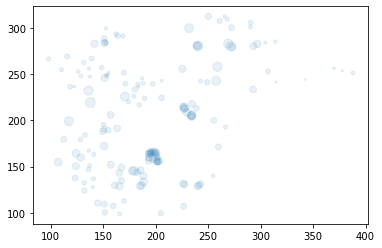

In [41]:
x0, y0 = 'x1', 'y1'
x1, y1 = 'x2', 'y2'
_r = 1
sigma_gauss = .5
data0 = ndf.copy()
x_range =200
y_range = 200
fun = lambda ds: ds+10

ndf1 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

In [42]:
ndf1[ndf1['x2'].isnull()]

,y0,x0,pais,NombrePais,dep,nomdep,prov,nomprov,sec,nombremunicipio,...,nombrerecinto,nHabilitados,temporary,FID,Dirección,repete,x1,y1,x2,y2
index,,,,,,,,,,,,,,,,,,,,,


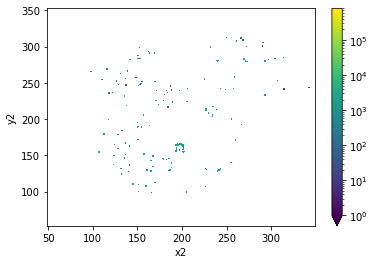

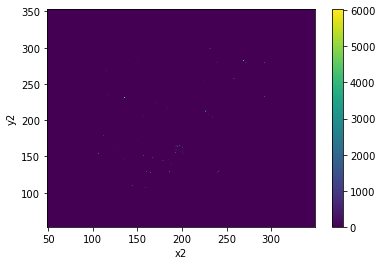

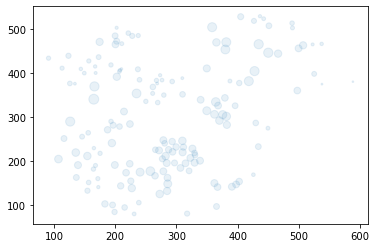

In [43]:
x0, y0 = 'x2', 'y2'
x1, y1 = 'x3', 'y3'
_r = .5
sigma_gauss = .5
data0 = ndf1.copy()
x_range = 150
y_range = 150
fun = lambda ds: ds+10

ndf2 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun, rad = 5
)

In [44]:
ndf1[ndf1['x2'].isnull()]

,y0,x0,pais,NombrePais,dep,nomdep,prov,nomprov,sec,nombremunicipio,...,nombrerecinto,nHabilitados,temporary,FID,Dirección,repete,x1,y1,x2,y2
index,,,,,,,,,,,,,,,,,,,,,


In [29]:
ndf2


,y0,x0,pais,NombrePais,dep,nomdep,prov,nomprov,sec,nombremunicipio,...,temporary,FID,Dirección,repete,x1,y1,x2,y2,x3,y3
index,,,,,,,,,,,,,,,,,,,,,
5322,52.525169,13.404181,4.0,Alemania,61,Berlín,1,Berlín,1,Berlín,...,NaN,0,NaN,1,186.085438,156.425405,176.245746,181.122503,356.770573,365.867253
5323,-34.589690,-58.416521,11.0,Argentina,10,Buenos Aires,1,Buenos Aires,1,C.A. Buenos Aires,...,NaN,1,NaN,24,113.113570,60.335493,98.236590,74.681955,176.636057,154.154622
5324,-34.578769,-58.393448,11.0,Argentina,10,Buenos Aires,1,Buenos Aires,1,C.A. Buenos Aires,...,NaN,1,NaN,24,113.260187,60.404077,102.950669,76.140550,204.691533,171.474300
5325,-34.582502,-58.403793,11.0,Argentina,10,Buenos Aires,1,Buenos Aires,1,C.A. Buenos Aires,...,NaN,1,NaN,24,113.194841,60.379733,100.870696,75.923469,194.447702,168.348037
5326,-34.580944,-58.373751,11.0,Argentina,10,Buenos Aires,1,Buenos Aires,1,C.A. Buenos Aires,...,NaN,1,NaN,24,113.381821,60.399353,107.033868,75.488640,240.999108,155.186709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,37.569699,127.002363,52.0,República de Corea del Sur,73,Seúl,1,Seúl,1,Seúl,...,NaN,73,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
5480,55.755514,37.618155,194.0,Rusia,72,Distr. Federal,1,Moscú,1,Moscú,...,NaN,114,NaN,1,208.323608,155.868655,193.217773,172.196696,390.277173,345.577764
5481,59.354110,18.099967,212.0,Suecia,66,Estocolmo,1,Estocolmo,1,Estocolmo,...,NaN,115,NaN,1,189.221846,162.958534,177.381001,185.475716,359.502842,373.947628
